In [2]:
import pandas as pd 
import numpy as np
import sys
import datetime
import spacy
tweets = pd.read_csv (r'C:\Users\enoch\Desktop\deltax\trumptweets.csv')
prices = pd.read_csv (r'C:\Users\enoch\Desktop\deltax\DX-Y.NYB.csv')


tweets["created_at"]= pd.to_datetime(tweets["created_at"]) 
tweets['date'] = tweets['created_at'].dt.date
prices["Date"]= pd.to_datetime(prices["Date"]) 
prices['date'] = prices['Date'].dt.date
prices = prices.set_index(['date'])
tweets = tweets.set_index(['date'])



  

In [4]:
prices

Date       Open       High        Low      Close  Adj Close  \
date                                                                           
2016-11-01 2016-11-01  98.389999  98.480003  97.639999  97.699997  97.699997   
2016-11-02 2016-11-02  97.750000  97.800003  97.180000  97.400002  97.400002   
2016-11-03 2016-11-03  97.379997  97.459999  97.040001  97.160004  97.160004   
2016-11-04 2016-11-04  97.160004  97.349998  96.889999  97.070000  97.070000   
2016-11-06 2016-11-06   0.000000   0.000000   0.000000   0.000000   0.000000   
...               ...        ...        ...        ...        ...        ...   
2020-07-19 2020-07-19   0.000000   0.000000   0.000000   0.000000   0.000000   
2020-07-20 2020-07-20  96.010002  96.180000  95.730003  95.830002  95.830002   
2020-07-21 2020-07-21  95.750000  95.919998  95.050003  95.120003  95.120003   
2020-07-22 2020-07-22  95.129997  95.410004  94.830002  94.970001  94.970001   
2020-07-23 2020-07-23  94.980003  95.180000  94.589996  94.690002  94.690002   

            Volume  
date                
2016-11-01       0  
2016-11-02       0  
2016-11-03       0  
2016-11-04       0  
2016-11-06       0  
...            ...  
2020-07-19       0  
2020-07-20       0  
2020-07-21       0  
2020-07-22       0  
2020-07-23       0  

[1130 rows x 7 columns]

In [7]:
relevantdate = prices.index.tolist() 
def following(time):
    if time not in relevantdate or (prices.loc[time].loc["High"]==0):
        return following(time+datetime.timedelta(days=1))
    else:
        return time;

def previous(time):
    if time not in relevantdate or (prices.loc[time].loc["High"]==0):
        return previous(time-datetime.timedelta(days=1))
    else:
        return time;


    
changes =[]


tweetdates = tweets.index.tolist()
for date in tweetdates:
    print(prices.loc[following(date+datetime.timedelta(days=1))].High,prices.loc[previous(date)].High)

    change = prices.loc[following(date+datetime.timedelta(days=1))].High - prices.loc[previous(date)].High
    print(change)
    changes.append(change)
   
 




96.699997 96.68
0.019996999999989384
96.699997 96.68
0.019996999999989384
96.699997 96.68
0.019996999999989384
96.699997 96.68
0.019996999999989384
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.29000

In [18]:
tweets.to_csv('yo.csv')

In [15]:
thing=[]
for i in changes:
    thing.append(i>0)
tweets['label']=thing

In [43]:
tweets

text  \
date                                                            
2020-07-13  So hard to watch @FoxNews anymore. They are wo...   
2020-07-13  Never in history have Police been treated so b...   
2020-07-13  “Republican voter registration is way up Democ...   
2020-07-13  Is this what you want for your President??? Wi...   
2020-07-12  No Radical Left anarchists agitators looters o...   
...                                                       ...   
2016-11-03  Watching my beautiful wife Melania speak about...   
2016-11-03  Looking at Air Force One @ MIA. Why is he camp...   
2016-11-03  ObamaCare is a total disaster. Hillary Clinton...   
2016-11-03  My wife Melania will be speaking in Pennsylvan...   
2016-11-03  Thank you Arlene! We will MAKE AMERICA SAFE AN...   

                    created_at  favorite_count   changes  label  
date                                                             
2020-07-13 2020-07-13 13:30:42          117169  0.019997   True  
2020-07-13 2020-07-13 12:05:39          191214  0.019997   True  
2020-07-13 2020-07-13 11:54:38          127048  0.019997   True  
2020-07-13 2020-07-13 11:41:35           85316  0.019997   True  
2020-07-12 2020-07-12 12:30:36          194467 -0.290001  False  
...                        ...             ...       ...    ...  
2016-11-03 2016-11-03 19:25:37           55454 -0.110001  False  
2016-11-03 2016-11-03 15:19:12           73759 -0.110001  False  
2016-11-03 2016-11-03 12:34:14           45972 -0.110001  False  
2016-11-03 2016-11-03 12:27:27           46156 -0.110001  False  
2016-11-03 2016-11-03 03:55:49           28978 -0.110001  False  

[17413 rows x 5 columns]

In [54]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [55]:
text = " ".join(review for review in tweets.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2826851 words in the combination of all review.


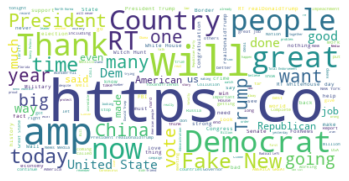

<Figure size 2160x2160 with 0 Axes>

In [61]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(30,30))
plt.show()